# Route Planning A 
---------------------------------------------

In [1]:
from IPython.core.display import HTML
import numpy as np
import matplotlib
import scipy
from scipy.stats import norm
from scipy.stats import binom
import pandas as pd
params = {'figure.figsize':(12,6), # These are plot parameters
         'xtick.labelsize': 16,
         'ytick.labelsize':16,
         'axes.titlesize':18,
         'axes.labelsize':18,
         'lines.markersize':4,
         'legend.fontsize': 20}
matplotlib.rcParams.update(params)
from matplotlib import pyplot as plt
import random
from ipywidgets import *
import numpy.linalg
from IPython.display import display
from IPython.core.display import HTML
from notebook.nbextensions import enable_nbextension 
%matplotlib inline

print('The libraries loaded successfully')

The libraries loaded successfully


Stochastic dynamic programming is a methodology for making sequential decisions in the face of uncertainty.  Route planning is a simple but intuitive example.  Controlling a Markov chain is a more general class of examples called Markov Decision Problems.


## Markov Decision Problems

Consider the random sequence $\{X_n, n \geq 0\}$ that takes values in some discrete set ${\cal X}$ and is such that 

$$P[X_{n+1} = j \mid X_n = i, a_n = a] = P(i,j;a), \mbox{ for }a \in {\cal A}(i) \mbox{ and } i, j \in {\cal X}, $$

where ${\cal A}(i)$ is a set of possible values of $a_n$ when $X_n = i$.

Thus, $X_n$ behaves like a Markov chain, except that its transition probabilities are "controlled" by the actions $a_n$. The goal is to choose the actions $a_n$ to minimize some expected cost that we define next.

The simplest formulation is to minimize

$$\sum_{n=0}^N E[c(X_n, a_n)]$$

where $c(\cdot, \cdot)$ is a given function that represents the cost of taking action $a_n$ when the state
is $X_n$.  The main observation is that it is generally not best to be greedy and choose the value of $a_n$
that minimizes $c(X_n, a_n)$.  The reason is that a more expensive action $a_n$ might result in a preferable
subsequent state $X_{n+1}$.  Thus, short term sacrifices may result in larger overall returns, like going to college.

Bellman's breakthrough is to define $V_N(x)$ as the minimum value of that cost given that $X_0 = x$.  The minimum is over the possible choices of the actions as a function of the state and the number of steps to go.  With this definition, one has

$$V_{N+1}(x) = \min_{a \in {\cal A}(x)} [c(x, a) + \sum_y P(x,y;a)V_N(x)].$$

When $N \to \infty$, it may be that $V_N(x) \to V(x)$ that then satisfies

$$V(x) = \min_{a \in {\cal A}(x)} [c(x, a) + \sum_y P(x,y;a)V(x)].$$

This is the case if, for instance, the Markov chain gets absorbed after a finite mean time in some state where the cost is zero.

A small variation is when we consider the discounted cost

$$\sum_{n=0}^N E[\beta^n c(X_n, a_n)]$$

where $\beta \in (0, 1)$ is a discount factor.  We then define $V_N(x; \beta)$ as the minimum value of the cost starting with $X_0 = x$ and one has

$$V_{N+1}(x; \beta) = \min_{a \in {\cal A}(x)} [c(x, a) + \beta \sum_y P(x,y;a)V_N(x; \beta)].$$

If the cost $c(\cdot, \cdot)$ is bounded, then the cost remains finite as $N \to \infty$.  In that case,
$V_N(x; \beta) \to V(x; \beta)$ and this limit is such that

$$V(x; \beta) = \min_{a \in {\cal A}(x)} [c(x, a) + \beta \sum_y P(x,y;a)V(x; \beta)].$$

In some cases, one may consider a continuous state space.  We will see this in examples.  


## Example 1: How to Gamble, If you Must

(We borrow the subtitle of a nice book by Dubbins and Savage.) 

You play a game of chance. You start with $M$ dollars.  At each step you choose how much to gamble.  If you gamble $a$, you win $a$ with probability $p$ and you lose $a$ otherwise.  Thus, if your fortune is $x$ and you gamble $a \leq x$, after that step, your fortune is $x + a$ with probability $p$ and $x - a$ with probability $q = 1 - p$.  You cannot gamble more than your current fortune.  Your goal is to maximize the probability that your fortune reaches $F$ for some given $F \geq M$ before your fortune reaches $0$.

How much should you gamble when your fortune is $x$?

Let $V(x)$ be the maximum probability of reaching $F$ before $0$, starting with a fortune equal to $x$.  Then, the DPEs are

$$V(x) = \max_{a \leq x} [pV(x + a) + qV(x - a)].$$

Also, $V(0) = 0$ and $V(F) = 1$.  The value $a(x)$ of $a$ that achieves the maximum is the optimal amount to gamble when the fortune is $x$.


**Theorem:**

If $p \geq 0.5$, then $a(x) = 1$ for all $x$ is optimal.  One says that **timid play is optimal** when the game is favorable.

**Proof:**

Let $U(x)$ be the probability of hitting $F$ before $0$ starting from $x$ when choosing $a(x) = 1$ for all $x$.  Then, the first step equations are

$$U(x) = pU(x+1) + qU(x-1), 1 \leq x \leq F; U(0) = 0, U(F) = 1.$$

For $p \neq q$, the solution can be verified to be 

$$U(x) = \frac{ 1- (q/p)^x}{1 - (q/p)^F}.$$

Also, when $p > 0.5$, we claim that

$$U(x) = pU(x+1) + qU(x-1) \geq pU(x + a) + qU(x - a), a \in \{1, 2, \ldots, x\}.$$

To see this, note that the expression for $U(x)$ shows that this inequality is equivalent to 

$$1 = p(q/p) + q(q/p)^{-1} \leq p(q/p)^a + q(q/p)^{-a}.$$

Now, $h(x) := (1/x - 1)^a$ is convex in $x$, which implies that $ph(p) + qh(q) \geq h((p+q)/2) = 1$.

This shows that $U$ satisfies the DPE and also that $a(x) = 1$ is optimal.

Unfortunately, the optimal strategy when $p < 0.5$ is more complicated.  We compute it below.

**Notes:** 

* Updates take time.

* For clarity, we plot $V(x) \times \max_y \{a(y)\}$ instead of $V(x)$.

In [4]:
def dummy(Nd,pd):
    global N, p
    N, p = int(Nd), float(pd)

pd = widgets.Dropdown(options=['0.1', '0.2', '0.3', '0.4','0.5','0.6','0.7','0.8','0.9','1'],value='0.5',description='$p$',disabled=False)
Nd = widgets.Dropdown(options=['10', '30', '50', '70','100'],value='50',description='N',disabled=False)

z = widgets.interactive(dummy, Nd = Nd, pd = pd) 
display(z)

interactive(children=(Dropdown(description='N', index=2, options=('10', '30', '50', '70', '100'), value='50'),…

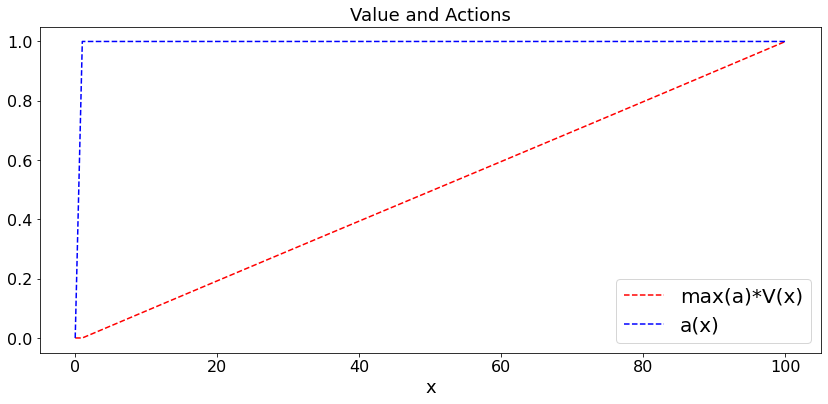

In [6]:
def MDP1(p,F):  # How to gamble if you must
    t = np.arange(0,F+1)
    a = np.arange(0.0,F+1)
    V = np.arange(0.0,F+1)
    W = np.arange(0.0,F+1)
    q = 1 - p
    
    
    for x in range(F+1):  # initialize V
        V[x] = (x == F) 
    S = 3*F
    W[F] = 1
    a[F] = 1
    for s in range(S):
        for x in range(1,F): # W = max_{1 <= u <= x} [p*V[x+u] + q*V[x-u]]
            y = 0.0           
            for u in range(1,x+1):
                z = p*V[min(F,x+u)] + q*V[x-u]
                if z > y + 0.01:
                    a[x] = u
                    y = z
            W[x] = y
        V = W
        
    plt.figure(figsize = (14,6))
    pltV, = plt.plot(t,max(a)*V,'r--',label='max(a)*V(x)')
    plt.legend()
    pltV, = plt.plot(t,a,'b--',label='a(x)')
    plt.legend()
    plt.title('Value and Actions')
    plt.xlabel('x')
        
MDP1(p,N)

        